In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

from torchvision import datasets, transforms
import matplotlib.pyplot as plt

plt.style.use(style='seaborn')

In [2]:
apply_transforms= transforms.Compose([transforms.ToTensor()])
Batchsize=10

trainset= datasets.MNIST(root='./data',
                        train=True,
                        download=True,
                        transform=apply_transforms)
trainloader= torch.utils.data.DataLoader(trainset,
                                batch_size=Batchsize,
                                shuffle=True)

testset= datasets.MNIST(root='./data',
                        train=False,
                        download=True,
                        transform=apply_transforms)
testloader= torch.utils.data.DataLoader(testset,
                                batch_size=Batchsize,
                                shuffle=False)

In [3]:
print(len(trainset))
print(len(testset))

60000
10000


In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1=nn.Linear(784, 100)
        self.fc2=nn.Linear(100, 10)

        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        x=x.flatten(start_dim=1)
        x=self.fc1(x)
        x=self.sigmoid(x)
        x=self.fc2(x)

        x=F.softmax(x, dim=1)
        return x



In [5]:
criterion = nn.CrossEntropyLoss()
learning_rate = 0.1
num_epochs = 50

gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = Net()
model = model.to(gpu)
optimizer = torch.optim.SGD(model.parameters(),
                        lr=learning_rate,
                        momentum=0.9)

In [6]:
train_loss =[]
train_acc =[]
for epoch in range(num_epochs):
    running_loss = 0.0
    running_acc = 0.0

    ## training step
    for i, data in enumerate(trainloader):
        inputs, labels =data
        inputs = inputs.to(gpu)
        labels = labels.to(gpu)

        ## forward + backprop + loss
        outputs = model(inputs)
        optimizer.zero_grad()
        preds = torch.argmax(outputs, dim=1)
        loss = criterion(outputs, labels)
        running_loss += loss

        running_acc += torch.sum(preds==labels)
        
    total_loss = running_loss/(i+1) 
    total_loss.backward()
    ## update model params
    optimizer.step()
    
    epoch_loss = running_loss.item()/(i+1)
    epoch_acc = running_acc.item()/60000

    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc)

    
    print('Epoch: %d | Loss: %.4f | Train Accuracy: %.4f' \
          %(epoch, epoch_loss, epoch_acc))

Epoch: 0 | Loss: 2.3031 | Train Accuracy: 0.0903
Epoch: 1 | Loss: 2.3031 | Train Accuracy: 0.0903
Epoch: 2 | Loss: 2.3030 | Train Accuracy: 0.0903
Epoch: 3 | Loss: 2.3029 | Train Accuracy: 0.0903
Epoch: 4 | Loss: 2.3027 | Train Accuracy: 0.0900
Epoch: 5 | Loss: 2.3025 | Train Accuracy: 0.0803
Epoch: 6 | Loss: 2.3023 | Train Accuracy: 0.1162
Epoch: 7 | Loss: 2.3021 | Train Accuracy: 0.1136
Epoch: 8 | Loss: 2.3019 | Train Accuracy: 0.1124
Epoch: 9 | Loss: 2.3016 | Train Accuracy: 0.1124
Epoch: 10 | Loss: 2.3014 | Train Accuracy: 0.1124
Epoch: 11 | Loss: 2.3011 | Train Accuracy: 0.1124
Epoch: 12 | Loss: 2.3008 | Train Accuracy: 0.1124
Epoch: 13 | Loss: 2.3005 | Train Accuracy: 0.1124
Epoch: 14 | Loss: 2.3003 | Train Accuracy: 0.1124
Epoch: 15 | Loss: 2.2999 | Train Accuracy: 0.1124
Epoch: 16 | Loss: 2.2996 | Train Accuracy: 0.1124
Epoch: 17 | Loss: 2.2993 | Train Accuracy: 0.1124
Epoch: 18 | Loss: 2.2990 | Train Accuracy: 0.1124
Epoch: 19 | Loss: 2.2986 | Train Accuracy: 0.1124
Epoch: 20 

Text(0, 0.5, 'Training Accuracy')

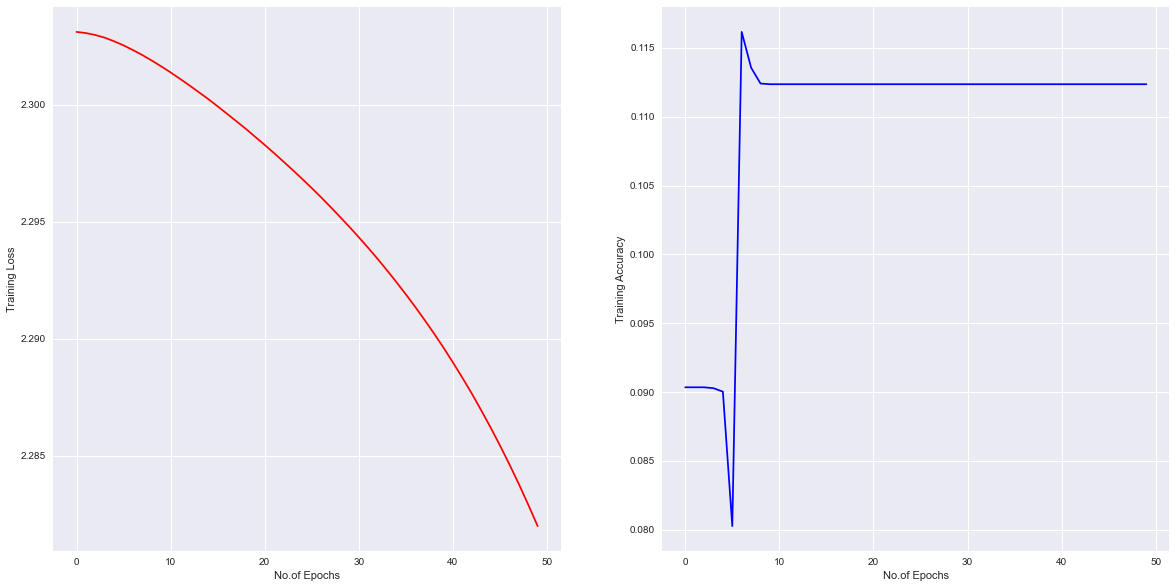

In [10]:
fig = plt.figure(figsize=(20,10))
plt.subplot(121)
plt.plot(range(num_epochs),train_loss, "r", label="Batchsize=10" )

plt.xlabel("No.of Epochs")
plt.ylabel("Training Loss")
plt.subplot(122)
plt.plot(range(num_epochs),train_acc, "b", label="Batchsize=10" )

plt.xlabel("No.of Epochs")
plt.ylabel("Training Accuracy")


In [11]:
test_acc = 0.0
test_run_loss = 0.0
test_run_acc = 0.0
for i, data in enumerate(testloader):
    inputs, labels =data
    inputs = inputs.to(gpu)
    labels = labels.to(gpu)

    outputs = model(inputs)
    preds = torch.argmax(outputs, dim=1)
    loss = criterion(outputs, labels)
    test_run_loss += loss
   
    test_run_acc += torch.sum(preds==labels)

test_loss = test_run_loss.item()/(i+1)
test_acc = test_run_acc.item()/10000
    
print('Test Loss: %.4f| Test Accuracy: %.4f' %(test_loss, test_acc))


Test Loss: 2.2803| Test Accuracy: 0.1135
